# KNN clasificacion

Tanto como existe el KNN mas cercano para regresiones, tambien hay un knn
para tipos de predicion por clasificacion 

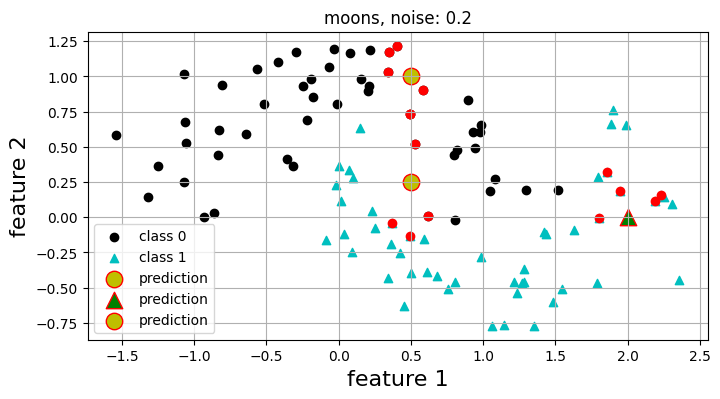

In [6]:
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_moons

def sort(unsorted_list):
    return (sorted(unsorted_list, key = lambda x: x[2]))

def KNN_prediction(k,X,y,x):
    distance = []
    for i in range(len(X)):
        # crear un par de grupos (X[i],y[i] distancia desde x hacia X[i])
        distance.append((X[i],y[i], math.sqrt((x[0] - X[i][0])**2) + (x[1] - X[i][1])**2))

    # ordenamos la distancia vectorial el cual es la distancia de x desde X[i]
    sorted_list = sort(distance)

    x1_neighbourhood, x2_neighbourhood, y_label = [],[],[];

    for i in range(k):
        y_label.append(sorted_list[i][1])
        x1_neighbourhood.append(sorted_list[i][0][0])
        x2_neighbourhood.append(sorted_list[i][0][1])
    
    return x1_neighbourhood,x2_neighbourhood,y_label


def prediction(y_label):
    sum_0, sum_1 = 0,0
    for i in range(len(y_label)):
        if y_label[i] == 0:
            sum_0 += 1
        else:
            sum_1 += 1
        
    if sum_0 >= sum_1:
        return 0
    else:
        return 1


def plot(x1_neighbourhood,x2_neighbourhood, vector_to_predict, y_label):
    if (prediction(y_label) == 1):
        color = 'g'; marker='^'
    else:
        color = 'y'; marker = 'o'
    
    plt.scatter(x1_neighbourhood,x2_neighbourhood,color='r', marker='o')
    
    # Mostramos los valores predecidos
    plt.scatter(vector_to_predict[0],vector_to_predict[1], color=color,
    edgecolors='r',s=140,marker=marker, label='prediction')

    return 


## agregamos los valores 
X, y = make_moons(n_samples=100, noise=0.2, random_state=10, )

plt.figure(figsize=(8,4))

for target,color, marker in zip(range(2),['k','c'],['o','^']):
    plt.scatter(X[y == target,0],X[y == target,1], c=color, marker=marker, label='class '+format(target))

# predecir el vector de predicion
for vector_to_predict in [[0.5,0.25], [2,0], [0.5,1]]:
    x1_neighbourhood, x2_neighbourhood, y_label = KNN_prediction(5, X, y,vector_to_predict)

    plot(x1_neighbourhood,x2_neighbourhood,vector_to_predict,y_label)

plt.legend()
plt.xlabel('feature 1', fontsize=16)
plt.ylabel('feature 2', fontsize=16)
plt.title('moons, noise: ' + format(0.2))
plt.grid(); plt.show()
